## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  89.350638  1632.979098  0.539461   9.068020  1.525606
1  58.513761  1079.257671  0.368240   6.003907  1.453590
2  20.000214  1261.335207  0.499071  10.747699  1.349261
3  78.855217   589.314117  0.872965  10.525850  1.417575
4  32.231912   798.906551  0.106826   5.358380  1.442313


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0778530	total: 69.3ms	remaining: 1m 9s
1:	learn: 1.0676168	total: 69.9ms	remaining: 34.9s
2:	learn: 1.0573054	total: 70.3ms	remaining: 23.4s
3:	learn: 1.0462137	total: 70.8ms	remaining: 17.6s
4:	learn: 1.0343634	total: 71.3ms	remaining: 14.2s
5:	learn: 1.0217046	total: 71.8ms	remaining: 11.9s
6:	learn: 1.0119256	total: 72.2ms	remaining: 10.2s
7:	learn: 1.0024722	total: 72.7ms	remaining: 9.01s
8:	learn: 0.9905929	total: 73.1ms	remaining: 8.05s
9:	learn: 0.9805307	total: 73.6ms	remaining: 7.29s
10:	learn: 0.9694326	total: 74.1ms	remaining: 6.66s
11:	learn: 0.9598011	total: 74.4ms	remaining: 6.13s
12:	learn: 0.9495502	total: 75ms	remaining: 5.69s
13:	learn: 0.9394630	total: 75.4ms	remaining: 5.31s
14:	learn: 0.9281707	total: 75.9ms	remaining: 4.98s
15:	learn: 0.9206036	total: 76.3ms	remaining: 4.7s
16:	learn: 0.9104345	total: 76.7ms	remaining: 4.44s
17:	learn: 0.9017741	total: 77.1ms	remaining: 4.21s
18:	learn: 0.8942570	total: 77.5ms	remaining: 4

94:	learn: 0.4637595	total: 109ms	remaining: 1.04s
95:	learn: 0.4601654	total: 109ms	remaining: 1.03s
96:	learn: 0.4566032	total: 110ms	remaining: 1.02s
97:	learn: 0.4531554	total: 110ms	remaining: 1.01s
98:	learn: 0.4502578	total: 111ms	remaining: 1.01s
99:	learn: 0.4474251	total: 111ms	remaining: 999ms
100:	learn: 0.4439760	total: 112ms	remaining: 993ms
101:	learn: 0.4407535	total: 112ms	remaining: 984ms
102:	learn: 0.4375863	total: 112ms	remaining: 977ms
103:	learn: 0.4342145	total: 113ms	remaining: 970ms
104:	learn: 0.4306171	total: 113ms	remaining: 964ms
105:	learn: 0.4277155	total: 113ms	remaining: 957ms
106:	learn: 0.4255022	total: 114ms	remaining: 950ms
107:	learn: 0.4216446	total: 114ms	remaining: 944ms
108:	learn: 0.4181142	total: 115ms	remaining: 938ms
109:	learn: 0.4153017	total: 115ms	remaining: 931ms
110:	learn: 0.4120236	total: 115ms	remaining: 925ms
111:	learn: 0.4088000	total: 116ms	remaining: 920ms
112:	learn: 0.4058080	total: 116ms	remaining: 914ms
113:	learn: 0.4028

272:	learn: 0.1712043	total: 186ms	remaining: 496ms
273:	learn: 0.1706330	total: 187ms	remaining: 495ms
274:	learn: 0.1697604	total: 187ms	remaining: 494ms
275:	learn: 0.1689310	total: 188ms	remaining: 493ms
276:	learn: 0.1682478	total: 188ms	remaining: 491ms
277:	learn: 0.1675497	total: 189ms	remaining: 490ms
278:	learn: 0.1668876	total: 189ms	remaining: 488ms
279:	learn: 0.1664710	total: 189ms	remaining: 487ms
280:	learn: 0.1659346	total: 190ms	remaining: 485ms
281:	learn: 0.1655277	total: 190ms	remaining: 484ms
282:	learn: 0.1647891	total: 191ms	remaining: 483ms
283:	learn: 0.1641124	total: 191ms	remaining: 481ms
284:	learn: 0.1636885	total: 191ms	remaining: 480ms
285:	learn: 0.1629751	total: 191ms	remaining: 478ms
286:	learn: 0.1624167	total: 192ms	remaining: 476ms
287:	learn: 0.1615834	total: 192ms	remaining: 475ms
288:	learn: 0.1608036	total: 193ms	remaining: 474ms
289:	learn: 0.1602422	total: 193ms	remaining: 473ms
290:	learn: 0.1594970	total: 194ms	remaining: 472ms
291:	learn: 

514:	learn: 0.0604031	total: 291ms	remaining: 274ms
515:	learn: 0.0603234	total: 292ms	remaining: 274ms
516:	learn: 0.0602449	total: 292ms	remaining: 273ms
517:	learn: 0.0600622	total: 293ms	remaining: 272ms
518:	learn: 0.0598239	total: 293ms	remaining: 272ms
519:	learn: 0.0597470	total: 294ms	remaining: 271ms
520:	learn: 0.0594910	total: 294ms	remaining: 270ms
521:	learn: 0.0594157	total: 294ms	remaining: 270ms
522:	learn: 0.0593414	total: 295ms	remaining: 269ms
523:	learn: 0.0592683	total: 295ms	remaining: 268ms
524:	learn: 0.0591964	total: 295ms	remaining: 267ms
525:	learn: 0.0590257	total: 296ms	remaining: 266ms
526:	learn: 0.0588594	total: 296ms	remaining: 266ms
527:	learn: 0.0587402	total: 297ms	remaining: 265ms
528:	learn: 0.0584689	total: 297ms	remaining: 264ms
529:	learn: 0.0583518	total: 297ms	remaining: 264ms
530:	learn: 0.0580893	total: 298ms	remaining: 263ms
531:	learn: 0.0578165	total: 298ms	remaining: 262ms
532:	learn: 0.0576688	total: 299ms	remaining: 262ms
533:	learn: 

701:	learn: 0.0358430	total: 369ms	remaining: 156ms
702:	learn: 0.0357898	total: 369ms	remaining: 156ms
703:	learn: 0.0357401	total: 369ms	remaining: 155ms
704:	learn: 0.0356909	total: 370ms	remaining: 155ms
705:	learn: 0.0356383	total: 370ms	remaining: 154ms
706:	learn: 0.0354773	total: 370ms	remaining: 154ms
707:	learn: 0.0354259	total: 371ms	remaining: 153ms
708:	learn: 0.0353277	total: 371ms	remaining: 152ms
709:	learn: 0.0351629	total: 372ms	remaining: 152ms
710:	learn: 0.0350005	total: 372ms	remaining: 151ms
711:	learn: 0.0348415	total: 373ms	remaining: 151ms
712:	learn: 0.0347464	total: 373ms	remaining: 150ms
713:	learn: 0.0345861	total: 374ms	remaining: 150ms
714:	learn: 0.0345361	total: 374ms	remaining: 149ms
715:	learn: 0.0344118	total: 375ms	remaining: 149ms
716:	learn: 0.0342897	total: 375ms	remaining: 148ms
717:	learn: 0.0342404	total: 375ms	remaining: 147ms
718:	learn: 0.0341684	total: 376ms	remaining: 147ms
719:	learn: 0.0340489	total: 376ms	remaining: 146ms
720:	learn: 

941:	learn: 0.0206435	total: 473ms	remaining: 29.1ms
942:	learn: 0.0206328	total: 474ms	remaining: 28.6ms
943:	learn: 0.0206042	total: 474ms	remaining: 28.1ms
944:	learn: 0.0205543	total: 475ms	remaining: 27.6ms
945:	learn: 0.0205089	total: 475ms	remaining: 27.1ms
946:	learn: 0.0204640	total: 476ms	remaining: 26.6ms
947:	learn: 0.0204515	total: 476ms	remaining: 26.1ms
948:	learn: 0.0204073	total: 477ms	remaining: 25.6ms
949:	learn: 0.0203968	total: 477ms	remaining: 25.1ms
950:	learn: 0.0203310	total: 477ms	remaining: 24.6ms
951:	learn: 0.0202927	total: 478ms	remaining: 24.1ms
952:	learn: 0.0202823	total: 478ms	remaining: 23.6ms
953:	learn: 0.0202390	total: 478ms	remaining: 23.1ms
954:	learn: 0.0201963	total: 479ms	remaining: 22.6ms
955:	learn: 0.0201840	total: 479ms	remaining: 22ms
956:	learn: 0.0201194	total: 480ms	remaining: 21.5ms
957:	learn: 0.0200718	total: 480ms	remaining: 21ms
958:	learn: 0.0200337	total: 480ms	remaining: 20.5ms
959:	learn: 0.0199961	total: 481ms	remaining: 20ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

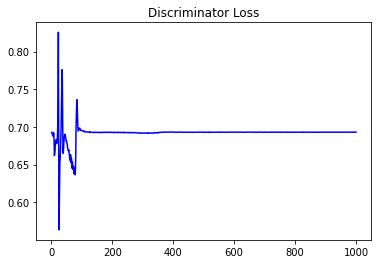

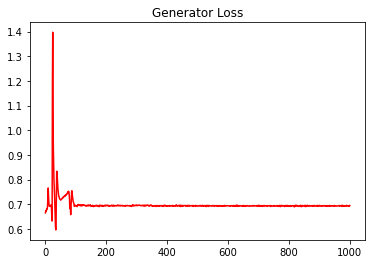

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13376573623698051


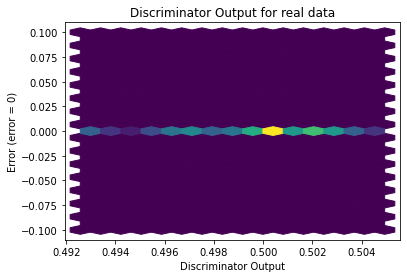

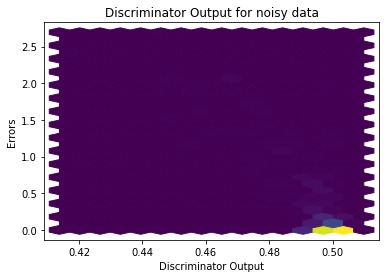

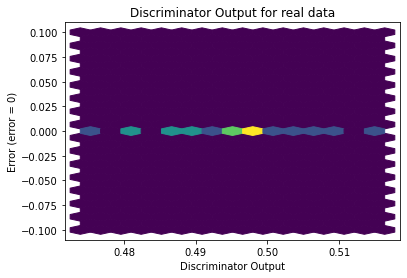

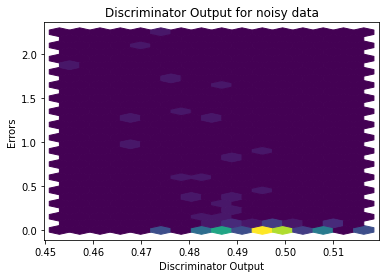

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


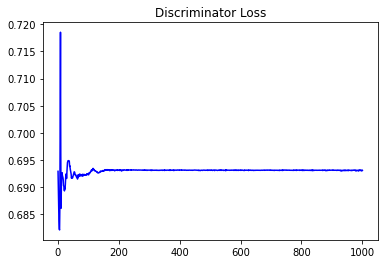

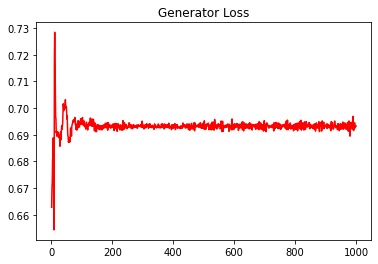

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0977891947823094


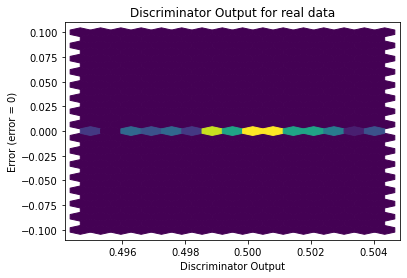

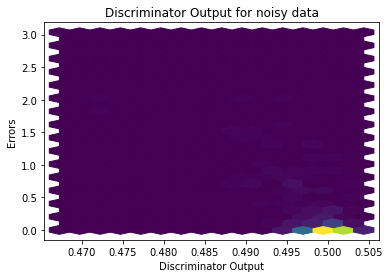

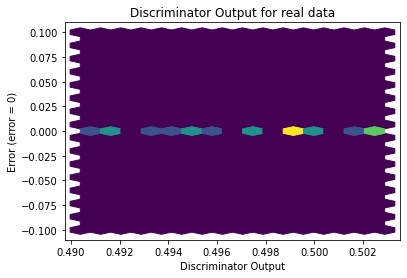

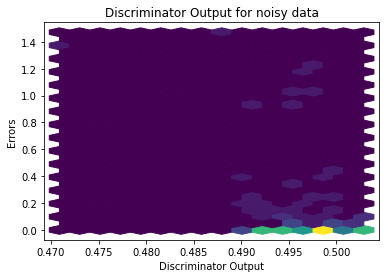

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3649]], requires_grad=True)
